<a href="https://colab.research.google.com/github/EduHdzVillasana/Analisis_Crimen_Chicago_BEDU/blob/main/Experimentos%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos con modelos de forecasting

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

In [2]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [3]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime.head(10)

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
5,2002-04-30,1322
6,2002-05-01,1450
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283


In [4]:
ts_crime.tail(10)

,Date,Total_Crimes
6924,2021-04-09,489
6925,2021-04-10,483
6926,2021-04-11,443
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474
6933,2021-04-18,1


In [7]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

## Función para convertir la serie de tiempo en data frame

In [8]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

## Regresión Lineal

### Instancia 1:
**Parámetros**
* Elementos por muestra : 7

In [9]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 7)

In [10]:
print(X.shape)
print(Y.shape)

(6926, 7)
(6926,)


In [11]:
Y[:10]

array([1244, 1296, 1283, 1254, 1234, 1278, 1372, 1366, 1492, 1235])

In [12]:
Y[-10:]

array([442, 489, 483, 443, 484, 481, 434, 443, 458, 474])

In [13]:
n = 7
start = n
end = ts_crime.shape[0] - 2
(start, end)

(7, 6932)

Empieza en la posicion 7 y termina en la posicion 6932

In [14]:
ts_crime[7:6933]

,Date,Total_Crimes
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283
10,2002-05-05,1254
11,2002-05-06,1234
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [15]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4848, 7)
(2078, 7)
(4848,)
(2078,)


In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [19]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][7:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6926, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

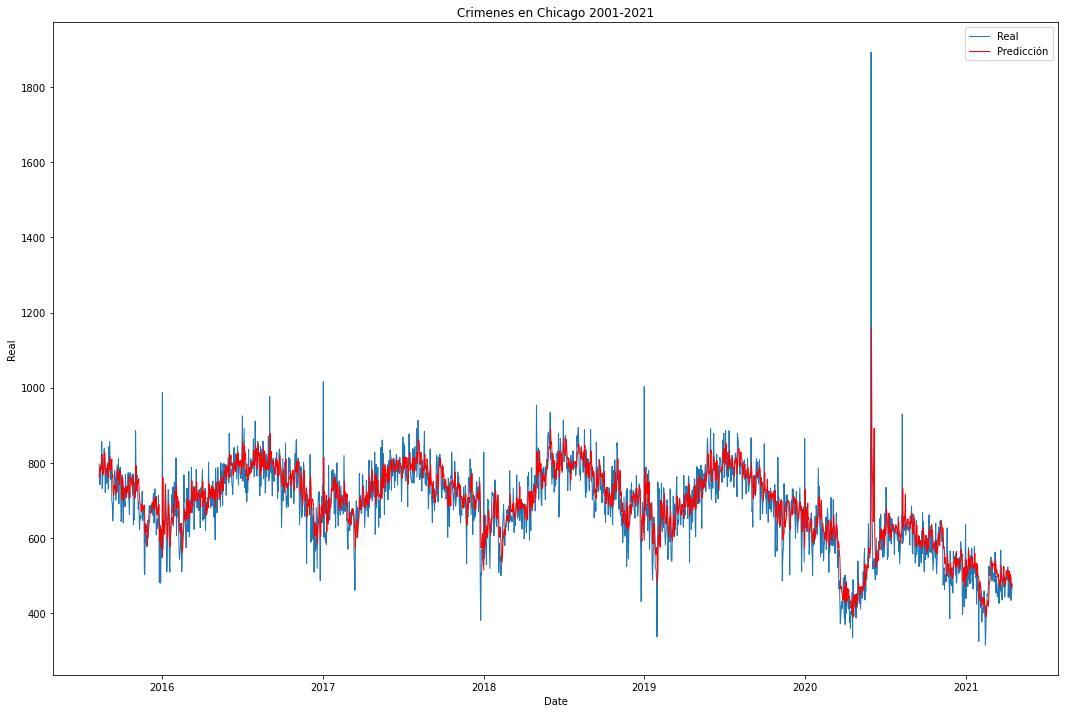

In [20]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [21]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6903.76454062773
r^2 = 0.9049712186725656


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

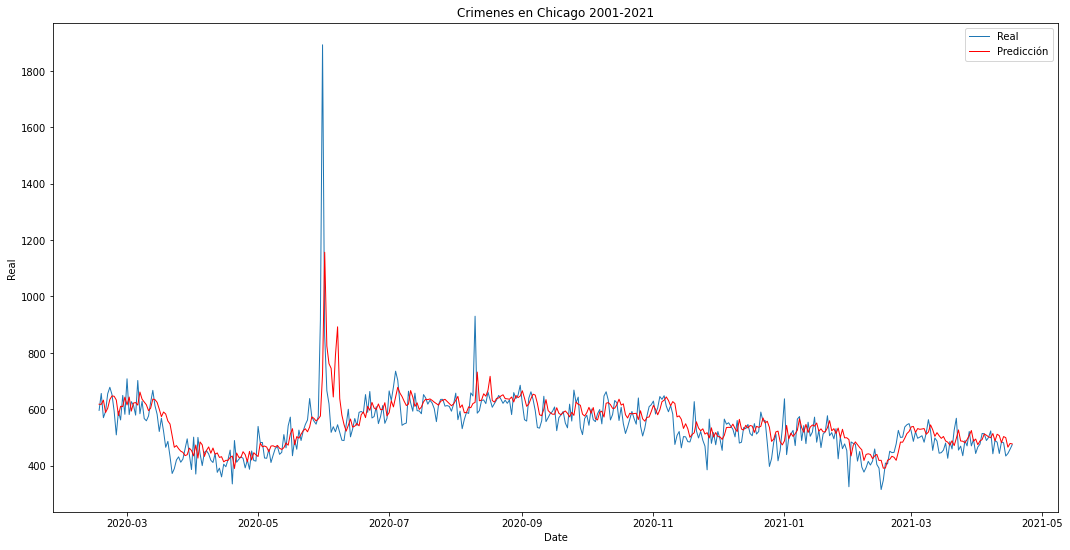

In [23]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [24]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[722, 745, 753, 793, 815, 837, 737]])

In [25]:
len(X_test)

2078

In [26]:
Y_f = []

In [27]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)
  #X_f.append(x_tmp)


In [28]:
len (Y_f)

2078

In [29]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"][index:],
                              "Real" : df_comparation["Real"][index:],
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

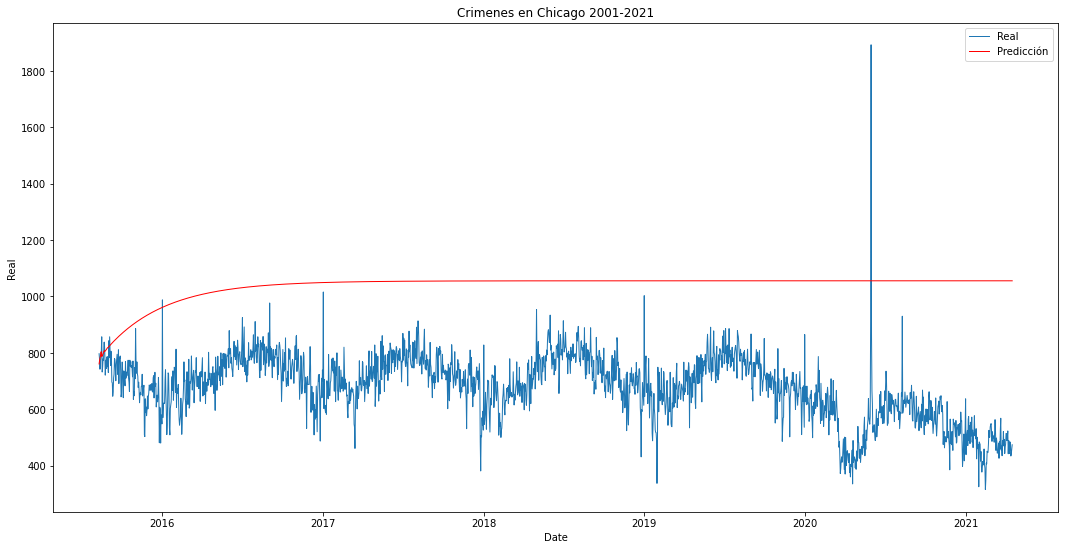

In [30]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [31]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 144693.4183690785
r^2 = -10.27376935818187
